# **Gabor-CNN for Pneumonia Classification with Contrast Processing Technique**

**Dataset**

1.   Original Data ([Check](https://))
2.   Image Enhancement ([Check](https://))
3.   Mahotas ([Check](https://))
4.   Contrast Limited Adaptive Histogram Equalization (CLAHE) ([Check](https://))





## Library

In [3]:
import os
import zipfile

import cv2
import numpy as np

import tensorflow as tf

from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten, GlobalMaxPool2D, AvgPool2D, GlobalAvgPool2D, BatchNormalization, Dropout

from PIL import Image, ImageEnhance
from numpy import asarray

## Mount Drive

In [4]:
# from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Extract Data

In [5]:
# local_zip = '/content/drive/MyDrive/Dataset/(ie) chest_xray.zip'
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall('/content/drive/MyDrive/Dataset/IE_CXR')
# zip_ref.close()

In [ ]:
# local_zip = '/content/drive/MyDrive/Dataset/(clahe) chest_xray.zip'
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall('/content/drive/MyDrive/Dataset/CLAHE_CXR')
# zip_ref.close()

In [6]:
# local_zip = '/content/drive/MyDrive/Dataset/(mahotas) chest_xray.zip'
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall('/content/drive/MyDrive/Dataset/MAHOTAS_CXR')
# zip_ref.close()

## Data Preprocessing

Data Preprocessing merupakan persiapan untuk mengubah Data Original menjadi Data Image Enhancement, Mahotas dan CLAHE. Proses ini dilakukan di Jupyter Notebook (Lokal) kemudian hasil output diupload ke Google Drive

### Image Enhancement

In [ ]:
for r, d, f in os.walk(normal):
    for file in f:
        imagePath = os.path.join(r, file)
        image = cv2.imread(imagePath)

        image = Image.fromarray(image)
        enhancer = ImageEnhance.Contrast(image)
        imgenhance = enhancer.enhance(2)

        imgenhance.save(file)

### Mahotas

In [ ]:
for r, d, f in os.walk(normal):
    for file in f:
        imagePath = os.path.join(r, file)
        image = cv2.imread(imagePath)

        T = mahotas.thresholding.otsu(image)
        (T, image) = cv2.threshold(image, T, 255, cv2.THRESH_BINARY)

        image = Image.fromarray(image)
        image.save(file)

### CLAHE

# **Original Image**

## Cek dataset

In [ ]:
base_dataset = '/content/drive/MyDrive/Dataset/IE_CXR'
train_dir = base_dataset+'/train'
test_dir = base_dataset+'/test'

In [ ]:
trainNormal = os.listdir(train_dir+"/NORMAL")
trainPneumonia = os.listdir(train_dir+"/PNEUMONIA")
print("Total Data Train Normal   : ",len(trainNormal))
print("Total Data Train Pneumonia   : ",len(trainPneumonia))
train_length = len(trainNormal) + len(trainPneumonia)

print("")
testNormal = os.listdir(test_dir+"/NORMAL")
testPneumonia = os.listdir(test_dir+"/PNEUMONIA")
print("Total Data Test Normal   : ",len(testNormal))
print("Total Data Test Pneumonia   : ",len(testPneumonia))
test_length = len(testNormal) + len(testPneumonia)

Total Data Train Normal   :  1341
Total Data Train Pneumonia   :  3875

Total Data Test Normal   :  234
Total Data Test Pneumonia   :  390


## Sample Image

Normal


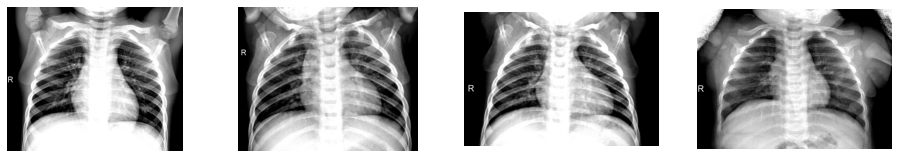

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 3
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 3)

pic_index += 4


print("Normal")
normal_pict = [os.path.join(base_dataset+"/train/NORMAL", fname)
                for fname in os.listdir(base_dataset+"/train/NORMAL")[pic_index-4:pic_index]]


for i, img_path in enumerate(normal_pict):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

Pneumonia


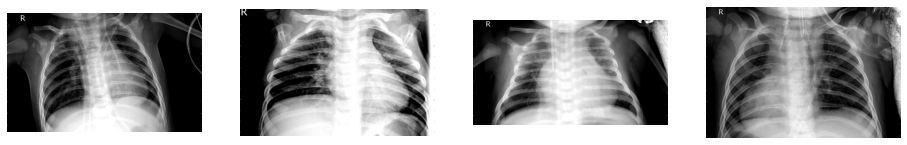

In [ ]:
nrows = 3
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 3)

pic_index += 4


print("Pneumonia")
pneumonia_pict = [os.path.join(base_dataset+"/train/PNEUMONIA", fname) 
                for fname in os.listdir(base_dataset+"/train/PNEUMONIA")[pic_index-4:pic_index]]


for i, img_path in enumerate(pneumonia_pict):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

## Preprocessing

### Gather Data

In [ ]:
import cv2
import numpy as np
# import mahotas

from PIL import Image, ImageEnhance
from numpy import asarray

train_dir_gather = os.path.join(train_dir)

train_data = []
train_label = []
i=0
for r, d, f in os.walk(train_dir_gather):
    for file in f:
        if ".jpeg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (128,128))

            train_data.append(image)

            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label) 
            if(i%1000==0):
              print(i)
            i = i+1

train_data = np.array(train_data)
train_label = np.array(train_label)

0
1000
2000
3000
4000
5000


In [ ]:
# Gather Data Test

test_dir_gather = os.path.join(test_dir)

test_data = []
test_label = []
i=0
for r, d, f in os.walk(test_dir_gather):
    for file in f:
        if ".jpeg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (128,128))

            test_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            test_label.append(label)
            if(i%500==0):
              print(i)
            i = i+1

test_data = np.array(test_data)
test_label = np.array(test_label)

0
500


In [ ]:
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Test Data = ", test_data.shape)
print("Test Label = ", test_label.shape)

Train Data =  (5216, 128, 128, 3)
Train Label =  (5216,)
Test Data =  (624, 128, 128, 3)
Test Label =  (624,)


### Grayscale

In [ ]:
def grayscale(data, dtype='float32'):
    # luma coding weighted average in video systems
    r, g, b = np.asarray(.3, dtype=dtype), np.asarray(.59, dtype=dtype), np.asarray(.11, dtype=dtype)
    rst = r * data[:, :, :, 0] + g * data[:, :, :, 1] + b * data[:, :, :, 2]
    return rst

In [ ]:
def add_dimension(data):
    data = np.array([data])
    #re arange the dimension
    print(data.shape)
    data = np.einsum('hijk->ijkh', data)
    return data

In [ ]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

x_train = add_dimension(grayscale(train_data))
x_test = add_dimension(grayscale(test_data))
# x_val = add_dimension(grayscale(val_data))
y_train = lb.fit_transform(train_label)
y_test = lb.fit_transform(test_label)
# y_val = lb.fit_transform(val_label)

(1, 5216, 128, 128)
(1, 624, 128, 128)


In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# x_val = x_val.astype('float32')
x_train  /= 255
x_test /= 255
# x_val /= 255

### Gabor

In [ ]:
from keras import backend as K

def custom_gabor(shape, dtype=None):
    pi = np.pi
    orientation_spread = np.array([0, pi/4, pi/2, pi*3/4, pi, pi*5/4, pi*3/2, 2*pi])
    scales = np.linspace(2, 4, 2)
    real_kernels = []
    img_kernels = []
#     size, sigma, theta, lambda, gamma aspect ratio
    for orientation in orientation_spread:
        for scale in scales:
            real_kernel = cv2.getGaborKernel((3, 3), 1, orientation, scale, 1, 0)
            imaginary_kernel = cv2.getGaborKernel((3, 3), 1, orientation, scale, 1, np.pi / 2)
            real_kernels.append(real_kernel)
            img_kernels.append(imaginary_kernel)
    stacked_list = np.vstack((real_kernels, img_kernels))
    # stack number equal to number of color channel RGB: ([stacked_list, stacked_list, stacked_list])
    stacked_list = np.array([stacked_list])
    stacked_list = np.einsum('hijk->jkhi', stacked_list)
    print(stacked_list.shape)

    stacked_list = K.variable(stacked_list)
    random = K.random_normal(shape, dtype=dtype)
    return stacked_list

## Augmentasi Data

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range = 10,
        zoom_range = 0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip = False,
        vertical_flip=False)

datagen.fit(x_test)

## Pengujian Model

### Rancangan Model

In [ ]:
model = Sequential()

model.add(InputLayer(input_shape=[128,128,1]))

model.add(Conv2D(filters=32, kernel_size=3, padding='same', kernel_initializer=custom_gabor, data_format='channels_last', strides=1, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=3, padding='same'))
model.add(Dropout(0.05))

model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=3, padding='same'))
model.add(Dropout(0.05))

model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=3, padding='same'))
model.add(Dropout(0.05))

model.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=3, padding='same'))
model.add(Dropout(0.05))

model.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=3, padding='same'))
model.add(Dropout(0.05))

model.add(Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=3, padding='same'))
model.add(Dropout(0.05))

model.add(Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=3, padding='same'))
model.add(Dropout(0.05))

model.add(GlobalMaxPool2D())
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

(3, 3, 1, 32)


In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.001, decay=1e-5), 
              loss='binary_crossentropy', 
              metrics=['acc'])

In [ ]:
H = model.fit(datagen1.flow(x_train,y_train, batch_size = 32), validation_data = (x_test, y_test), batch_size=32, epochs=100, class_weight={0:6.1, 1:2.1}, verbose=1)

Epoch 1/100
163/163 [==============================] - 9s 49ms/step - loss: 1.2079 - acc: 0.8218 - val_loss: 1.5948 - val_acc: 0.6250
Epoch 2/100
163/163 [==============================] - 7s 44ms/step - loss: 0.6578 - acc: 0.9163 - val_loss: 2.3813 - val_acc: 0.6250
Epoch 3/100
163/163 [==============================] - 7s 43ms/step - loss: 0.5231 - acc: 0.9325 - val_loss: 0.4266 - val_acc: 0.8734
Epoch 4/100
163/163 [==============================] - 7s 44ms/step - loss: 0.4741 - acc: 0.9449 - val_loss: 0.4195 - val_acc: 0.8558
Epoch 5/100
163/163 [==============================] - 7s 44ms/step - loss: 0.4763 - acc: 0.9341 - val_loss: 0.6748 - val_acc: 0.7019
Epoch 6/100
163/163 [==============================] - 7s 44ms/step - loss: 0.3886 - acc: 0.9523 - val_loss: 0.3924 - val_acc: 0.8670
Epoch 7/100
163/163 [==============================] - 7s 44ms/step - loss: 0.3908 - acc: 0.9467 - val_loss: 0.3414 - val_acc: 0.9103
Epoch 8/100
163/163 [==============================] - 7s 43ms

### Evaluasi Model

In [ ]:
%cd /content/drive/MyDrive/Kuliah/International Conference ICOICT 2021/Model

/content/drive/MyDrive/Kuliah/International Conference ICOICT 2021/Model


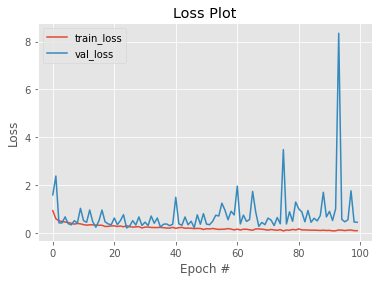

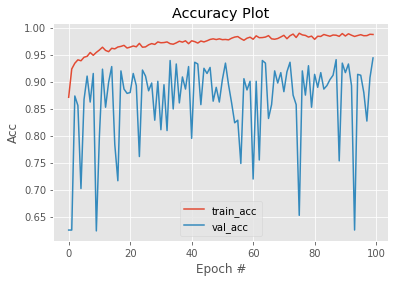

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.savefig('Loss4.svg')
plt.show()

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.savefig('Acc4.svg')
plt.show()

In [ ]:
accuracy = model.evaluate(x_train, y_train, verbose=1)
print('\n', 'Train_Accuracy:-', accuracy[1])
print('\n', 'Loss_Accuracy:-', accuracy[0])

163/163 [==============================] - 1s 5ms/step - loss: 0.1092 - acc: 0.9607

 Train_Accuracy:- 0.9606978297233582

 Loss_Accuracy:- 0.10920623689889908


In [ ]:
accuracy = model.evaluate(x_test, y_test, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy[1])
print('\n', 'Loss_Accuracy:-', accuracy[0])

20/20 [==============================] - 0s 5ms/step - loss: 0.4488 - acc: 0.9439

 Test_Accuracy:- 0.9439102411270142

 Loss_Accuracy:- 0.44877585768699646


In [ ]:
from sklearn.metrics import classification_report
print("Skenario Original")
pred = model.predict(x_test)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_test, labels, target_names = ['Pneumonia (Class 0)','Normal (Class 1)']))

Skenario 4
                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.96      0.89      0.92       234
   Normal (Class 1)       0.94      0.98      0.96       390

           accuracy                           0.94       624
          macro avg       0.95      0.93      0.94       624
       weighted avg       0.94      0.94      0.94       624



### Save Model

In [ ]:
from keras.models import load_model

model4.save('Skenario Original.h5')
# model3 = load_model('Skenario 3.h5')

# **Image Enhancement**

## Cek dataset

In [118]:
base_dataset = '/content/drive/MyDrive/Dataset/IE_CXR'
train_dir = base_dataset+'/train'
test_dir = base_dataset+'/test'

In [119]:
trainNormal = os.listdir(train_dir+"/NORMAL")
trainPneumonia = os.listdir(train_dir+"/PNEUMONIA")
print("Total Data Train Normal   : ",len(trainNormal))
print("Total Data Train Pneumonia   : ",len(trainPneumonia))
train_length = len(trainNormal) + len(trainPneumonia)

print("")
testNormal = os.listdir(test_dir+"/NORMAL")
testPneumonia = os.listdir(test_dir+"/PNEUMONIA")
print("Total Data Test Normal   : ",len(testNormal))
print("Total Data Test Pneumonia   : ",len(testPneumonia))
test_length = len(testNormal) + len(testPneumonia)

Total Data Train Normal   :  1341
Total Data Train Pneumonia   :  3875

Total Data Test Normal   :  234
Total Data Test Pneumonia   :  390


## Sample Image

Normal


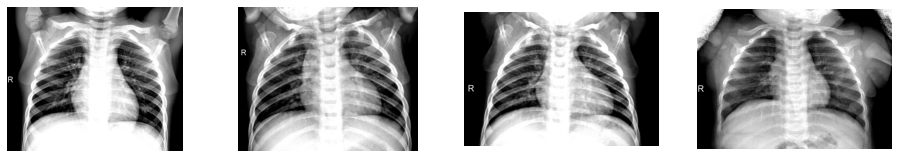

In [120]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 3
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 3)

pic_index += 4


print("Normal")
normal_pict = [os.path.join(base_dataset+"/train/NORMAL", fname)
                for fname in os.listdir(base_dataset+"/train/NORMAL")[pic_index-4:pic_index]]


for i, img_path in enumerate(normal_pict):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

Pneumonia


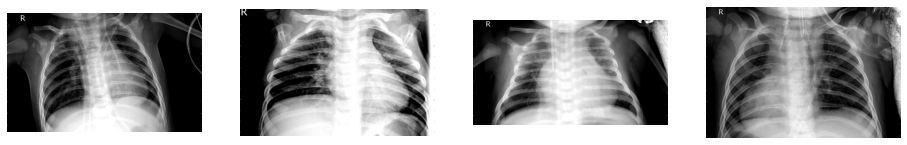

In [121]:
nrows = 3
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 3)

pic_index += 4


print("Pneumonia")
pneumonia_pict = [os.path.join(base_dataset+"/train/PNEUMONIA", fname) 
                for fname in os.listdir(base_dataset+"/train/PNEUMONIA")[pic_index-4:pic_index]]


for i, img_path in enumerate(pneumonia_pict):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

## Preprocessing

### Gather Data

In [122]:
import cv2
import numpy as np
# import mahotas

from PIL import Image, ImageEnhance
from numpy import asarray

train_dir_gather = os.path.join(train_dir)

train_data = []
train_label = []
i=0
for r, d, f in os.walk(train_dir_gather):
    for file in f:
        if ".jpeg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (128,128))

            train_data.append(image)

            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label) 
            if(i%1000==0):
              print(i)
            i = i+1

train_data = np.array(train_data)
train_label = np.array(train_label)

0
1000
2000
3000
4000
5000


In [123]:
# Gather Data Test

test_dir_gather = os.path.join(test_dir)

test_data = []
test_label = []
i=0
for r, d, f in os.walk(test_dir_gather):
    for file in f:
        if ".jpeg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (128,128))

            test_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            test_label.append(label)
            if(i%500==0):
              print(i)
            i = i+1

test_data = np.array(test_data)
test_label = np.array(test_label)

0
500


In [124]:
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Test Data = ", test_data.shape)
print("Test Label = ", test_label.shape)

Train Data =  (5216, 128, 128, 3)
Train Label =  (5216,)
Test Data =  (624, 128, 128, 3)
Test Label =  (624,)


### Grayscale

In [125]:
def grayscale(data, dtype='float32'):
    # luma coding weighted average in video systems
    r, g, b = np.asarray(.3, dtype=dtype), np.asarray(.59, dtype=dtype), np.asarray(.11, dtype=dtype)
    rst = r * data[:, :, :, 0] + g * data[:, :, :, 1] + b * data[:, :, :, 2]
    return rst

In [126]:
def add_dimension(data):
    data = np.array([data])
    #re arange the dimension
    print(data.shape)
    data = np.einsum('hijk->ijkh', data)
    return data

In [127]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

x_train = add_dimension(grayscale(train_data))
x_test = add_dimension(grayscale(test_data))
# x_val = add_dimension(grayscale(val_data))
y_train = lb.fit_transform(train_label)
y_test = lb.fit_transform(test_label)
# y_val = lb.fit_transform(val_label)

(1, 5216, 128, 128)
(1, 624, 128, 128)


In [128]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# x_val = x_val.astype('float32')
x_train  /= 255
x_test /= 255
# x_val /= 255

### Gabor

In [129]:
from keras import backend as K

def custom_gabor(shape, dtype=None):
    pi = np.pi
    orientation_spread = np.array([0, pi/4, pi/2, pi*3/4, pi, pi*5/4, pi*3/2, 2*pi])
    scales = np.linspace(2, 4, 2)
    real_kernels = []
    img_kernels = []
#     size, sigma, theta, lambda, gamma aspect ratio
    for orientation in orientation_spread:
        for scale in scales:
            real_kernel = cv2.getGaborKernel((3, 3), 1, orientation, scale, 1, 0)
            imaginary_kernel = cv2.getGaborKernel((3, 3), 1, orientation, scale, 1, np.pi / 2)
            real_kernels.append(real_kernel)
            img_kernels.append(imaginary_kernel)
    stacked_list = np.vstack((real_kernels, img_kernels))
    # stack number equal to number of color channel RGB: ([stacked_list, stacked_list, stacked_list])
    stacked_list = np.array([stacked_list])
    stacked_list = np.einsum('hijk->jkhi', stacked_list)
    print(stacked_list.shape)

    stacked_list = K.variable(stacked_list)
    random = K.random_normal(shape, dtype=dtype)
    return stacked_list

## Augmentasi Data

In [130]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range = 10,
        zoom_range = 0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip = False,
        vertical_flip=False)

datagen.fit(x_test)

## Pengujian Model

### Rancangan Model

In [140]:
model = Sequential()

model.add(InputLayer(input_shape=[128,128,1]))

model.add(Conv2D(filters=32, kernel_size=3, padding='same', kernel_initializer=custom_gabor, data_format='channels_last', strides=1, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=3, padding='same'))
# model.add(Dropout(0.05))

model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=3, padding='same'))
# model.add(Dropout(0.05))

model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=3, padding='same'))
# model.add(Dropout(0.05))

model.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=3, padding='same'))
# model.add(Dropout(0.05))

model.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=3, padding='same'))
# model.add(Dropout(0.05))

model.add(Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=3, padding='same'))
# model.add(Dropout(0.05))

model.add(Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=3, padding='same'))
# model.add(Dropout(0.05))

model.add(GlobalMaxPool2D())
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

(3, 3, 1, 32)


In [141]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001, decay=1e-5), 
              loss='binary_crossentropy', 
              metrics=['acc'])

In [142]:
H = model.fit(datagen.flow(x_train,y_train, batch_size = 32), validation_data = (x_test, y_test), batch_size=32, epochs=100, class_weight={0:6.1, 1:2.1}, verbose=1)

Epoch 1/100
163/163 [==============================] - 14s 75ms/step - loss: 0.8731 - acc: 0.8777 - val_loss: 1.1062 - val_acc: 0.6250
Epoch 2/100
163/163 [==============================] - 12s 72ms/step - loss: 0.6051 - acc: 0.9174 - val_loss: 2.6200 - val_acc: 0.6250
Epoch 3/100
163/163 [==============================] - 11s 69ms/step - loss: 0.5089 - acc: 0.9296 - val_loss: 2.4884 - val_acc: 0.6266
Epoch 4/100
163/163 [==============================] - 11s 70ms/step - loss: 0.4671 - acc: 0.9415 - val_loss: 1.8066 - val_acc: 0.6426
Epoch 5/100
163/163 [==============================] - 11s 68ms/step - loss: 0.4778 - acc: 0.9398 - val_loss: 0.4216 - val_acc: 0.8750
Epoch 6/100
163/163 [==============================] - 11s 70ms/step - loss: 0.4341 - acc: 0.9480 - val_loss: 0.3740 - val_acc: 0.8830
Epoch 7/100
163/163 [==============================] - 11s 68ms/step - loss: 0.3936 - acc: 0.9513 - val_loss: 0.2823 - val_acc: 0.9087
Epoch 8/100
163/163 [==============================] - 

### Evaluasi Model

In [143]:
%cd /content/drive/MyDrive/Simponia/IE

/content/drive/MyDrive/Simponia/IE


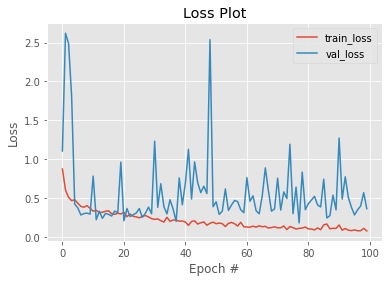

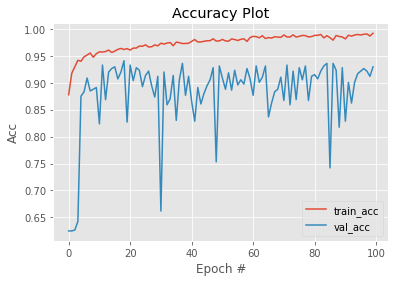

In [144]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.savefig('IE_LOSS.svg')
plt.show()

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.savefig('IE_ACC.svg')
plt.show()

In [145]:
accuracy = model.evaluate(x_train, y_train, verbose=1)
print('\n', 'Train_Accuracy:-', accuracy[1])
print('\n', 'Loss_Accuracy:-', accuracy[0])

163/163 [==============================] - 3s 14ms/step - loss: 0.1834 - acc: 0.9356

 Train_Accuracy:- 0.9355828166007996

 Loss_Accuracy:- 0.18343788385391235


In [146]:
accuracy = model.evaluate(x_test, y_test, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy[1])
print('\n', 'Loss_Accuracy:-', accuracy[0])

20/20 [==============================] - 0s 14ms/step - loss: 0.3637 - acc: 0.9295

 Test_Accuracy:- 0.9294871687889099

 Loss_Accuracy:- 0.3636569082736969


In [147]:
from sklearn.metrics import classification_report
print("Skenario Image ENhancement")
pred = model.predict(x_test)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_test, labels, target_names = ['Pneumonia (Class 0)','Normal (Class 1)']))

Skenario Image ENhancement
                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.92      0.89      0.90       234
   Normal (Class 1)       0.94      0.95      0.94       390

           accuracy                           0.93       624
          macro avg       0.93      0.92      0.92       624
       weighted avg       0.93      0.93      0.93       624



### Save Model

In [148]:
from keras.models import load_model

model.save('IE.h5')
# model3 = load_model('Skenario 3.h5')

# **MAHOTAS**

## Cek dataset

In [149]:
base_dataset = '/content/drive/MyDrive/Dataset/MAHOTAS_CXR'
train_dir = base_dataset+'/train'
test_dir = base_dataset+'/test'

In [150]:
trainNormal = os.listdir(train_dir+"/NORMAL")
trainPneumonia = os.listdir(train_dir+"/PNEUMONIA")
print("Total Data Train Normal   : ",len(trainNormal))
print("Total Data Train Pneumonia   : ",len(trainPneumonia))
train_length = len(trainNormal) + len(trainPneumonia)

print("")
testNormal = os.listdir(test_dir+"/NORMAL")
testPneumonia = os.listdir(test_dir+"/PNEUMONIA")
print("Total Data Test Normal   : ",len(testNormal))
print("Total Data Test Pneumonia   : ",len(testPneumonia))
test_length = len(testNormal) + len(testPneumonia)

Total Data Train Normal   :  1342
Total Data Train Pneumonia   :  2339

Total Data Test Normal   :  234
Total Data Test Pneumonia   :  390


## Sample Image

**Normal**

Normal


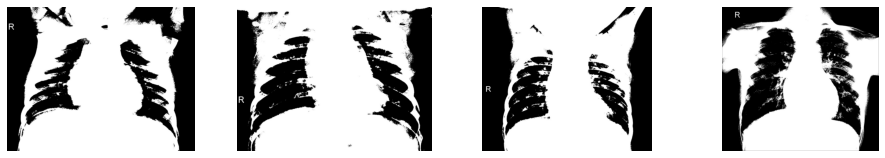

In [151]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 3
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 3)

pic_index += 4


print("Normal")
normal_pict = [os.path.join(base_dataset+"/train/NORMAL", fname)
                for fname in os.listdir(base_dataset+"/train/NORMAL")[pic_index-4:pic_index]]


for i, img_path in enumerate(normal_pict):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

**Pneumonia**

Pneumonia


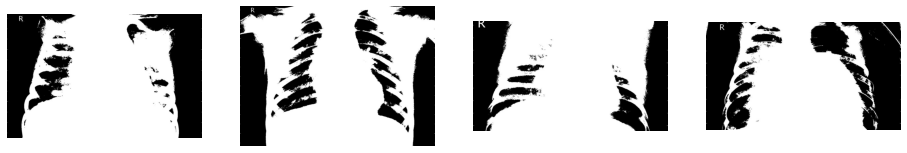

In [152]:
nrows = 3
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 3)

pic_index += 4


print("Pneumonia")
pneumonia_pict = [os.path.join(base_dataset+"/train/PNEUMONIA", fname) 
                for fname in os.listdir(base_dataset+"/train/PNEUMONIA")[pic_index-4:pic_index]]


for i, img_path in enumerate(pneumonia_pict):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

## Preprocessing

### Gather Data

In [153]:
import cv2
import numpy as np
# import mahotas

from PIL import Image, ImageEnhance
from numpy import asarray

train_dir_gather = os.path.join(train_dir)

train_data = []
train_label = []
i=0
for r, d, f in os.walk(train_dir_gather):
    for file in f:
        if ".jpeg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (128,128))

            train_data.append(image)

            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label) 
            if(i%1000==0):
              print(i)
            i = i+1

train_data = np.array(train_data)
train_label = np.array(train_label)

0
1000
2000
3000


In [154]:
# Gather Data Test

test_dir_gather = os.path.join(test_dir)

test_data = []
test_label = []
i=0
for r, d, f in os.walk(test_dir_gather):
    for file in f:
        if ".jpeg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (128,128))

            test_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            test_label.append(label)
            if(i%500==0):
              print(i)
            i = i+1

test_data = np.array(test_data)
test_label = np.array(test_label)

0
500


In [155]:
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Test Data = ", test_data.shape)
print("Test Label = ", test_label.shape)

Train Data =  (3680, 128, 128, 3)
Train Label =  (3680,)
Test Data =  (624, 128, 128, 3)
Test Label =  (624,)


### Grayscale

In [156]:
def grayscale(data, dtype='float32'):
    # luma coding weighted average in video systems
    r, g, b = np.asarray(.3, dtype=dtype), np.asarray(.59, dtype=dtype), np.asarray(.11, dtype=dtype)
    rst = r * data[:, :, :, 0] + g * data[:, :, :, 1] + b * data[:, :, :, 2]
    return rst

In [157]:
def add_dimension(data):
    data = np.array([data])
    #re arange the dimension
    print(data.shape)
    data = np.einsum('hijk->ijkh', data)
    return data

In [158]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

x_train = add_dimension(grayscale(train_data))
x_test = add_dimension(grayscale(test_data))
# x_val = add_dimension(grayscale(val_data))
y_train = lb.fit_transform(train_label)
y_test = lb.fit_transform(test_label)
# y_val = lb.fit_transform(val_label)

(1, 3680, 128, 128)
(1, 624, 128, 128)


In [159]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# x_val = x_val.astype('float32')
x_train  /= 255
x_test /= 255
# x_val /= 255

### Gabor

In [160]:
from keras import backend as K

def custom_gabor(shape, dtype=None):
    pi = np.pi
    orientation_spread = np.array([0, pi/4, pi/2, pi*3/4, pi, pi*5/4, pi*3/2, 2*pi])
    scales = np.linspace(2, 4, 2)
    real_kernels = []
    img_kernels = []
#     size, sigma, theta, lambda, gamma aspect ratio
    for orientation in orientation_spread:
        for scale in scales:
            real_kernel = cv2.getGaborKernel((3, 3), 1, orientation, scale, 1, 0)
            imaginary_kernel = cv2.getGaborKernel((3, 3), 1, orientation, scale, 1, np.pi / 2)
            real_kernels.append(real_kernel)
            img_kernels.append(imaginary_kernel)
    stacked_list = np.vstack((real_kernels, img_kernels))
    # stack number equal to number of color channel RGB: ([stacked_list, stacked_list, stacked_list])
    stacked_list = np.array([stacked_list])
    stacked_list = np.einsum('hijk->jkhi', stacked_list)
    print(stacked_list.shape)

    stacked_list = K.variable(stacked_list)
    random = K.random_normal(shape, dtype=dtype)
    return stacked_list

## Augmentasi Data

In [161]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range = 10,
        zoom_range = 0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip = False,
        vertical_flip=False)

datagen.fit(x_test)

## Pengujian Model

### Rancangan Model

In [162]:
model = Sequential()

model.add(InputLayer(input_shape=[128,128,1]))

model.add(Conv2D(filters=32, kernel_size=3, padding='same', kernel_initializer=custom_gabor, data_format='channels_last', strides=1, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=3, padding='same'))
# model.add(Dropout(0.05))

model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=3, padding='same'))
# model.add(Dropout(0.05))

model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=3, padding='same'))
# model.add(Dropout(0.05))

model.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=3, padding='same'))
# model.add(Dropout(0.05))

model.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=3, padding='same'))
# model.add(Dropout(0.05))

model.add(Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=3, padding='same'))
# model.add(Dropout(0.05))

model.add(Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=3, padding='same'))
# model.add(Dropout(0.05))

model.add(GlobalMaxPool2D())
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

(3, 3, 1, 32)


In [163]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001, decay=1e-5), 
              loss='binary_crossentropy', 
              metrics=['acc'])

In [164]:
H = model.fit(datagen.flow(x_train,y_train, batch_size = 32), validation_data = (x_test, y_test), batch_size=32, epochs=100, class_weight={0:6.1, 1:2.1}, verbose=1)

Epoch 1/100
115/115 [==============================] - 10s 74ms/step - loss: 1.3713 - acc: 0.7965 - val_loss: 0.6839 - val_acc: 0.6250
Epoch 2/100
115/115 [==============================] - 8s 68ms/step - loss: 0.9588 - acc: 0.8701 - val_loss: 0.4146 - val_acc: 0.8381
Epoch 3/100
115/115 [==============================] - 8s 68ms/step - loss: 0.7709 - acc: 0.8959 - val_loss: 0.4401 - val_acc: 0.8269
Epoch 4/100
115/115 [==============================] - 8s 67ms/step - loss: 0.7023 - acc: 0.9098 - val_loss: 0.4877 - val_acc: 0.8253
Epoch 5/100
115/115 [==============================] - 8s 66ms/step - loss: 0.6879 - acc: 0.9101 - val_loss: 1.0124 - val_acc: 0.7788
Epoch 6/100
115/115 [==============================] - 8s 66ms/step - loss: 0.6647 - acc: 0.9073 - val_loss: 0.5916 - val_acc: 0.8686
Epoch 7/100
115/115 [==============================] - 8s 67ms/step - loss: 0.5830 - acc: 0.9217 - val_loss: 0.4394 - val_acc: 0.8622
Epoch 8/100
115/115 [==============================] - 8s 68m

### Evaluasi Model

In [165]:
%cd /content/drive/MyDrive/Simponia/MAHOTAS

/content/drive/MyDrive/Simponia/MAHOTAS


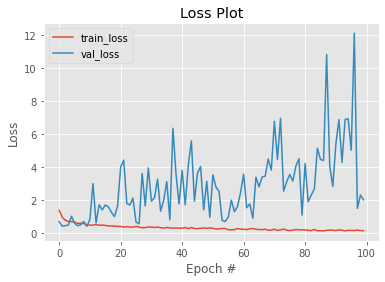

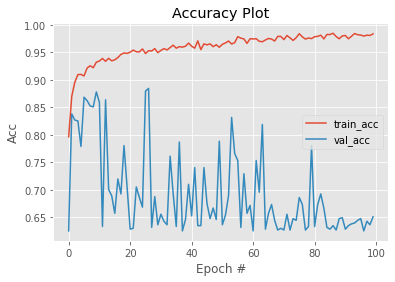

In [166]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.savefig('MAHOTAS_LOSS.svg')
plt.show()

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.savefig('MAHOTAS_ACC.svg')
plt.show()

In [167]:
accuracy = model.evaluate(x_train, y_train, verbose=1)
print('\n', 'Train_Accuracy:-', accuracy[1])
print('\n', 'Loss_Accuracy:-', accuracy[0])

115/115 [==============================] - 2s 14ms/step - loss: 0.7570 - acc: 0.7413

 Train_Accuracy:- 0.741304337978363

 Loss_Accuracy:- 0.757030725479126


In [168]:
accuracy = model.evaluate(x_test, y_test, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy[1])
print('\n', 'Loss_Accuracy:-', accuracy[0])

20/20 [==============================] - 0s 14ms/step - loss: 2.0130 - acc: 0.6506

 Test_Accuracy:- 0.6506410241127014

 Loss_Accuracy:- 2.012986660003662


In [169]:
from sklearn.metrics import classification_report
print("Skenario MAHOTAS")
pred = model.predict(x_test)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_test, labels, target_names = ['Pneumonia (Class 0)','Normal (Class 1)']))

Skenario MAHOTAS
                     precision    recall  f1-score   support

Pneumonia (Class 0)       1.00      0.07      0.13       234
   Normal (Class 1)       0.64      1.00      0.78       390

           accuracy                           0.65       624
          macro avg       0.82      0.53      0.45       624
       weighted avg       0.78      0.65      0.54       624



### Save Model

In [170]:
from keras.models import load_model

model.save('MAHOTAS.h5')
# model3 = load_model('Skenario 3.h5')

# **Contrast Limited Adaptive Histogram Equalization (CLAHE)**

## Cek dataset

In [171]:
base_dataset = '/content/drive/MyDrive/Dataset/CLAHE_CXR'
train_dir = base_dataset+'/train'
test_dir = base_dataset+'/test'

In [172]:
trainNormal = os.listdir(train_dir+"/NORMAL")
trainPneumonia = os.listdir(train_dir+"/PNEUMONIA")
print("Total Data Train Normal   : ",len(trainNormal))
print("Total Data Train Pneumonia   : ",len(trainPneumonia))
train_length = len(trainNormal) + len(trainPneumonia)

print("")
testNormal = os.listdir(test_dir+"/NORMAL")
testPneumonia = os.listdir(test_dir+"/PNEUMONIA")
print("Total Data Test Normal   : ",len(testNormal))
print("Total Data Test Pneumonia   : ",len(testPneumonia))
test_length = len(testNormal) + len(testPneumonia)

Total Data Train Normal   :  1341
Total Data Train Pneumonia   :  3875

Total Data Test Normal   :  234
Total Data Test Pneumonia   :  390


## Sample Image

**Normal**

Normal


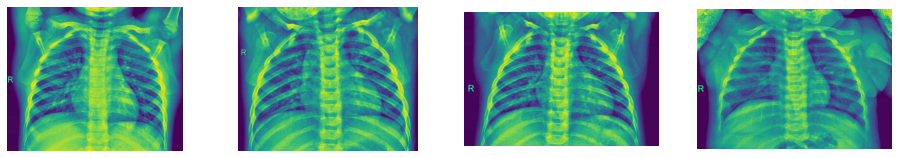

In [173]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 3
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 3)

pic_index += 4


print("Normal")
normal_pict = [os.path.join(base_dataset+"/train/NORMAL", fname)
                for fname in os.listdir(base_dataset+"/train/NORMAL")[pic_index-4:pic_index]]


for i, img_path in enumerate(normal_pict):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

**Pneumonia**

Pneumonia


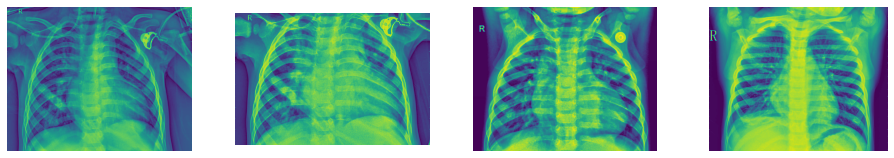

In [174]:
nrows = 3
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 3)

pic_index += 4


print("Pneumonia")
pneumonia_pict = [os.path.join(base_dataset+"/train/PNEUMONIA", fname) 
                for fname in os.listdir(base_dataset+"/train/PNEUMONIA")[pic_index-4:pic_index]]


for i, img_path in enumerate(pneumonia_pict):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

## Preprocessing

### Gather Data

In [175]:
import cv2
import numpy as np
# import mahotas

from PIL import Image, ImageEnhance
from numpy import asarray

train_dir_gather = os.path.join(train_dir)

train_data = []
train_label = []
i=0
for r, d, f in os.walk(train_dir_gather):
    for file in f:
        if ".jpeg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (128,128))

            train_data.append(image)

            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label) 
            if(i%1000==0):
              print(i)
            i = i+1

train_data = np.array(train_data)
train_label = np.array(train_label)

0
1000
2000
3000
4000
5000


In [176]:
# Gather Data Test

test_dir_gather = os.path.join(test_dir)

test_data = []
test_label = []
i=0
for r, d, f in os.walk(test_dir_gather):
    for file in f:
        if ".jpeg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (128,128))

            test_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            test_label.append(label)
            if(i%500==0):
              print(i)
            i = i+1

test_data = np.array(test_data)
test_label = np.array(test_label)

0
500


In [177]:
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Test Data = ", test_data.shape)
print("Test Label = ", test_label.shape)

Train Data =  (5216, 128, 128, 3)
Train Label =  (5216,)
Test Data =  (624, 128, 128, 3)
Test Label =  (624,)


### Grayscale

In [178]:
def grayscale(data, dtype='float32'):
    # luma coding weighted average in video systems
    r, g, b = np.asarray(.3, dtype=dtype), np.asarray(.59, dtype=dtype), np.asarray(.11, dtype=dtype)
    rst = r * data[:, :, :, 0] + g * data[:, :, :, 1] + b * data[:, :, :, 2]
    return rst

In [179]:
def add_dimension(data):
    data = np.array([data])
    #re arange the dimension
    print(data.shape)
    data = np.einsum('hijk->ijkh', data)
    return data

In [180]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

x_train = add_dimension(grayscale(train_data))
x_test = add_dimension(grayscale(test_data))
# x_val = add_dimension(grayscale(val_data))
y_train = lb.fit_transform(train_label)
y_test = lb.fit_transform(test_label)
# y_val = lb.fit_transform(val_label)

(1, 5216, 128, 128)
(1, 624, 128, 128)


In [181]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# x_val = x_val.astype('float32')
x_train  /= 255
x_test /= 255
# x_val /= 255

### Gabor

In [182]:
from keras import backend as K

def custom_gabor(shape, dtype=None):
    pi = np.pi
    orientation_spread = np.array([0, pi/4, pi/2, pi*3/4, pi, pi*5/4, pi*3/2, 2*pi])
    scales = np.linspace(2, 4, 2)
    real_kernels = []
    img_kernels = []
#     size, sigma, theta, lambda, gamma aspect ratio
    for orientation in orientation_spread:
        for scale in scales:
            real_kernel = cv2.getGaborKernel((3, 3), 1, orientation, scale, 1, 0)
            imaginary_kernel = cv2.getGaborKernel((3, 3), 1, orientation, scale, 1, np.pi / 2)
            real_kernels.append(real_kernel)
            img_kernels.append(imaginary_kernel)
    stacked_list = np.vstack((real_kernels, img_kernels))
    # stack number equal to number of color channel RGB: ([stacked_list, stacked_list, stacked_list])
    stacked_list = np.array([stacked_list])
    stacked_list = np.einsum('hijk->jkhi', stacked_list)
    print(stacked_list.shape)

    stacked_list = K.variable(stacked_list)
    random = K.random_normal(shape, dtype=dtype)
    return stacked_list

## Augmentasi Data

In [183]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range = 10,
        zoom_range = 0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip = False,
        vertical_flip=False)

datagen.fit(x_test)

## Pengujian Model

### Rancangan Model

In [184]:
model = Sequential()

model.add(InputLayer(input_shape=[128,128,1]))

model.add(Conv2D(filters=32, kernel_size=3, padding='same', kernel_initializer=custom_gabor, data_format='channels_last', strides=1, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=3, padding='same'))
# model.add(Dropout(0.05))

model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=3, padding='same'))
# model.add(Dropout(0.05))

model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=3, padding='same'))
# model.add(Dropout(0.05))

model.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=3, padding='same'))
# model.add(Dropout(0.05))

model.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=3, padding='same'))
# model.add(Dropout(0.05))

model.add(Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=3, padding='same'))
# model.add(Dropout(0.05))

model.add(Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=3, padding='same'))
# model.add(Dropout(0.05))

model.add(GlobalMaxPool2D())
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

(3, 3, 1, 32)


In [185]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001, decay=1e-5), 
              loss='binary_crossentropy', 
              metrics=['acc'])

In [186]:
H = model.fit(datagen.flow(x_train,y_train, batch_size = 32), validation_data = (x_test, y_test), batch_size=32, epochs=100, class_weight={0:6.1, 1:2.1}, verbose=1)

Epoch 1/100
163/163 [==============================] - 13s 70ms/step - loss: 0.8426 - acc: 0.8844 - val_loss: 1.3331 - val_acc: 0.6250
Epoch 2/100
163/163 [==============================] - 11s 67ms/step - loss: 0.5422 - acc: 0.9285 - val_loss: 2.6040 - val_acc: 0.6250
Epoch 3/100
163/163 [==============================] - 11s 69ms/step - loss: 0.5012 - acc: 0.9417 - val_loss: 0.4531 - val_acc: 0.8429
Epoch 4/100
163/163 [==============================] - 11s 67ms/step - loss: 0.4530 - acc: 0.9411 - val_loss: 0.2206 - val_acc: 0.9087
Epoch 5/100
163/163 [==============================] - 11s 68ms/step - loss: 0.3915 - acc: 0.9528 - val_loss: 0.4272 - val_acc: 0.8478
Epoch 6/100
163/163 [==============================] - 11s 66ms/step - loss: 0.3920 - acc: 0.9511 - val_loss: 0.2985 - val_acc: 0.8974
Epoch 7/100
163/163 [==============================] - 11s 67ms/step - loss: 0.3611 - acc: 0.9532 - val_loss: 0.3680 - val_acc: 0.8926
Epoch 8/100
163/163 [==============================] - 

### Evaluasi Model

In [187]:
%cd /content/drive/MyDrive/Simponia/CLAHE

/content/drive/MyDrive/Simponia/CLAHE


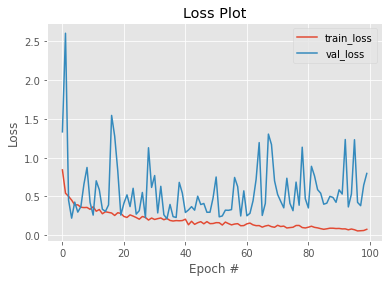

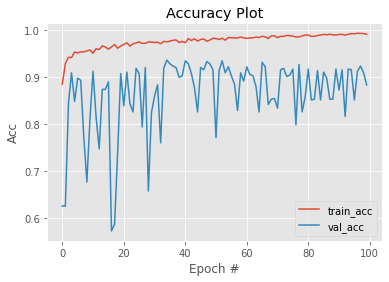

In [188]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.savefig('CLAHE_LOSS.svg')
plt.show()

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.savefig('CLAHE_ACC.svg')
plt.show()

In [189]:
accuracy = model.evaluate(x_train, y_train, verbose=1)
print('\n', 'Train_Accuracy:-', accuracy[1])
print('\n', 'Loss_Accuracy:-', accuracy[0])

163/163 [==============================] - 3s 14ms/step - loss: 0.0246 - acc: 0.9912

 Train_Accuracy:- 0.991180956363678

 Loss_Accuracy:- 0.02460341341793537


In [190]:
accuracy = model.evaluate(x_test, y_test, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy[1])
print('\n', 'Loss_Accuracy:-', accuracy[0])

20/20 [==============================] - 0s 14ms/step - loss: 0.7969 - acc: 0.8830

 Test_Accuracy:- 0.8830128312110901

 Loss_Accuracy:- 0.796891987323761


In [191]:
from sklearn.metrics import classification_report
print("Skenario CLAHE")
pred = model.predict(x_test)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_test, labels, target_names = ['Pneumonia (Class 0)','Normal (Class 1)']))

Skenario CLAHE
                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.97      0.71      0.82       234
   Normal (Class 1)       0.85      0.98      0.91       390

           accuracy                           0.88       624
          macro avg       0.91      0.85      0.87       624
       weighted avg       0.89      0.88      0.88       624



### Save Model

In [192]:
from keras.models import load_model

model.save('CLAHE.h5')
# model3 = load_model('Skenario 3.h5')